In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv'
* Sort from highest to lowest. 
* Change the xticks to two letter country abbreviations.


In [6]:
coffee_production = pd.read_csv("./total-production.csv").T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop("total_production")

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [7]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [8]:
top10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]

top10_producers.head()

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
dtype: object

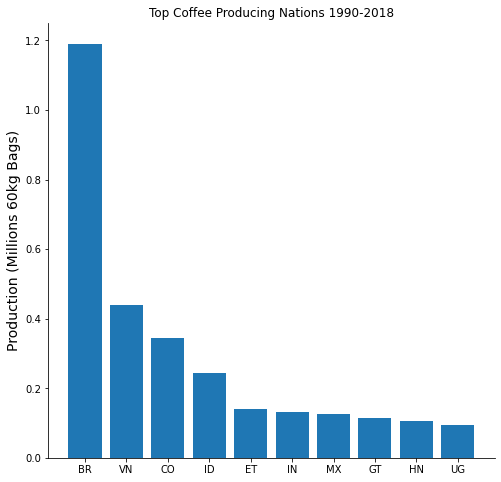

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(x=top10_producers.index, height=top10_producers / 1000000)

positions = list(range(10))
labels = ["BR", "VN", "CO", "ID", "ET", "IN", "MX", "GT", "HN", "UG"]

ax.set_title("Top Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Millions 60kg Bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [10]:
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = top5.index.astype("datetime64[ns]")

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990-01-01,27285.6286,1310.288,14396.0,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.047,3631.609,12964.0,5367.878,2762.73


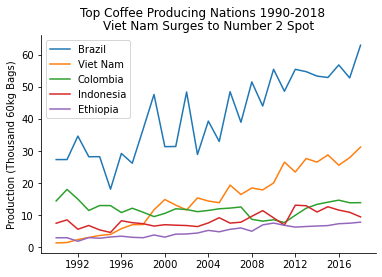

In [11]:
fig, ax = plt.subplots()

ax.plot(top5.index, coffee_production["Brazil"] / 1000, label="Brazil")
ax.plot(top5.index, coffee_production["Viet Nam"] / 1000, label="Viet Nam")
ax.plot(top5.index, coffee_production["Colombia"] / 1000, label="Colombia")
ax.plot(top5.index, coffee_production["Indonesia"] / 1000, label="Indonesia")
ax.plot(top5.index, coffee_production["Ethiopia"] / 1000, label="Ethiopia")

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()
plt.show()

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [12]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )

brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


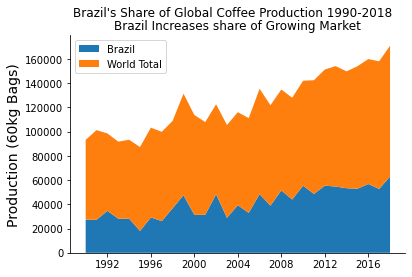

In [13]:
fig, ax = plt.subplots()

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)


fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left")

## PRICE RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

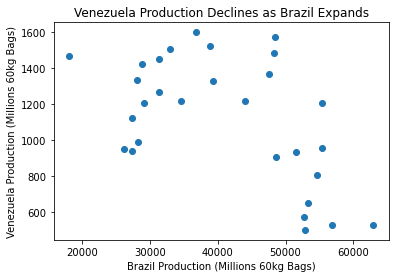

In [14]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"], 
    coffee_production["Venezuela"]
)

ax.set_title("Venezuela Production Declines as Brazil Expands")
ax.set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

Text(0.5, 0, 'Brazil Production (Millions 60kg Bags)')

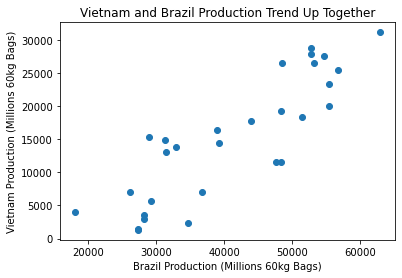

In [15]:
fig, ax = plt.subplots()

ax.scatter(
    coffee_production["Brazil"], 
    coffee_production["Viet Nam"], 
)

ax.set_title("Vietnam and Brazil Production Trend Up Together")
ax.set_ylabel("Vietnam Production (Millions 60kg Bags)")
ax.set_xlabel("Brazil Production (Millions 60kg Bags)")

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [16]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    45786.0003
Name: 2018, dtype: object

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

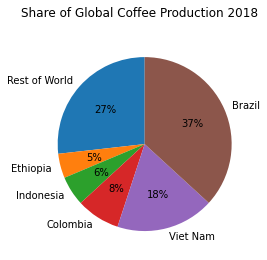

In [17]:
fig, ax = plt.subplots()

ax.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2018")

In [18]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,105831.7400
1991,27293.4934,117110.2770
1992,34603.3542,103163.1160
1993,28166.9786,103042.3560
1994,28192.0470,105516.0770
1995,18060.2022,113867.6570
1996,29196.7430,120052.3490
1997,26148.0040,117647.3100
1998,36760.8533,116119.3556
1999,47577.8065,136127.7035


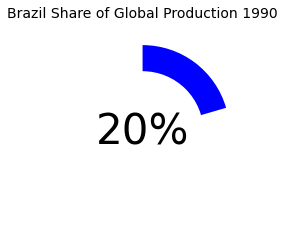

In [19]:
fig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

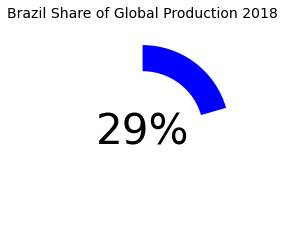

In [20]:
ig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)

plt.show()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [21]:
consumption = pd.read_csv("./imports.csv").set_index("imports").mean(axis=1)

consumption.name = "imports"

consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
Name: imports, dtype: float64

In [22]:
prices = pd.read_csv("./retail-prices.csv").set_index("retail_prices").mean(axis=1)


prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
dtype: float64

In [23]:
price_cons = (pd.DataFrame(prices)
              .merge(consumption, 
                    left_on=prices.index, 
                    right_on=consumption.index, 
                    how="inner"
            )
           .sort_values(["imports"], ascending=False)
)

price_cons.columns= ["country", "Price", "Imports"]


price_cons["country"] = price_cons["country"].str.strip(" ")

price_cons

,country,Price,Imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


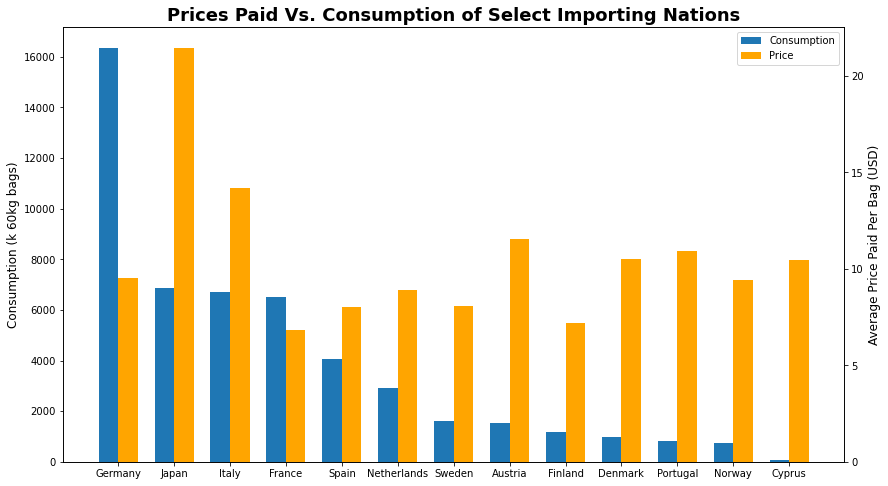

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

width=.35
x=np.arange(0, len(price_cons["country"]))

bar1 = ax.bar(x-width/2, price_cons["Imports"], width=width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)


ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons["Price"], width=width, color="orange")
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"])

plt.show()